# $ Analisis\ exploratorio\ 2019\ -\ Events \ $

In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

events = pd.read_csv('/home/barbara/Documentos/datos/datos2019/data2/events.csv',low_memory = False)

## ahora analizaremos el data frame


In [12]:
events.head(1)


,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17


In [13]:
events.dtypes

date                   object
event_id                int64
ref_type                int64
ref_hash                int64
application_id          int64
attributed               bool
device_countrycode      int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id               object
user_agent            float64
event_uuid             object
carrier               float64
kind                  float64
device_os             float64
wifi                   object
connection_type        object
ip_address              int64
device_language       float64
dtype: object

### Podemos observar que hay muchos de 64 bits, eso lo podemos reducir para que ocupe menos memoria

### Con info podemos observar la memoria que ocupa actualmente

In [2]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), float64(10), int64(6), object(5)
memory usage: 402.0+ MB


### Si haríamos lo que viene a continuacion en este DF, se reduciria el espacio en memoria ocupado, pero se perderían datos

events['event_id'] = events['event_id'].astype(np.int8)
events['ref_type'] = events['ref_type'].astype(np.int8)
events['ref_hash'] = events['ref_hash'].astype(np.int8)
events['application_id'] = events['application_id'].astype(np.int8)
events['device_countrycode'] = events['device_countrycode'].astype(np.int8)
events['device_os_version'] = events['device_os_version'].astype(np.float16)
events['device_brand'] = events['device_brand'].astype(np.float16)
events['device_model'] = events['device_model'].astype(np.float16)
events['device_city'] = events['device_city'].astype(np.float16)
events['session_user_agent'] = events['session_user_agent'].astype(np.float16)
events['user_agent'] = events['user_agent'].astype(np.float16)
events['carrier'] = events['carrier'].astype(np.float16)
events['kind'] = events['kind'].astype(np.float16)
events['device_os'] = events['device_os'].astype(np.float16)
events['ip_address'] = events['ip_address'].astype(np.int8)
events['device_language'] = events['device_language'].astype(np.float16)

### Pero con esto convertiremos las filas de cada columna en categoria, porque al fin y al cabo lo son


In [3]:
events['event_id'] = events['event_id'].astype('category')
events['ref_type'] = events['ref_type'].astype('category')
events['ref_hash'] = events['ref_hash'].astype('category')
events['application_id'] = events['application_id'].astype('category')
events['device_countrycode'] = events['device_countrycode'].astype('category')
events['device_os_version'] = events['device_os_version'].astype('category')
events['device_brand'] = events['device_brand'].astype('category')
events['device_model'] = events['device_model'].astype('category')
events['device_city'] = events['device_city'].astype('category')
events['session_user_agent'] = events['session_user_agent'].astype('category')
events['user_agent'] = events['user_agent'].astype('category')
events['carrier'] = events['carrier'].astype('category')
events['kind'] = events['kind'].astype('category')
events['device_os'] = events['device_os'].astype('category')
events['ip_address'] = events['ip_address'].astype('category')
events['device_language'] = events['device_language'].astype('category')

In [4]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              category
ref_type              category
ref_hash              category
application_id        category
attributed            bool
device_countrycode    category
device_os_version     category
device_brand          category
device_model          category
device_city           category
session_user_agent    category
trans_id              object
user_agent            category
event_uuid            object
carrier               category
kind                  category
device_os             category
wifi                  object
connection_type       object
ip_address            category
device_language       category
dtypes: bool(1), category(16), object(5)
memory usage: 190.4+ MB


## Cantidad de filas del df

In [7]:
len(events)

2494423

In [8]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


### Importamos el calendario, y agregamos 3 columnas adicionales para interpretar  mas detalladamente en que momento ocurrio el evento

In [22]:
import calendar 

In [23]:
events['date'] = pd.to_datetime(events['date'])
events['Year'] = events['date'].map(lambda x:x.year)
events['Weekday'] = events['date'].map(lambda x:x.weekday_name)
events['Hour'] = pd.to_datetime(events['date'], format='%H:%M',errors='coerce').dt.hour

/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
categoria = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

events['Weekday'] = events['Weekday'].astype('category', categories=categoria, ordered=True)

/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


## A continuacion se plotea los diferentes eventos en algun tiempo determinado.

Text(0,0.5,'Eventos')

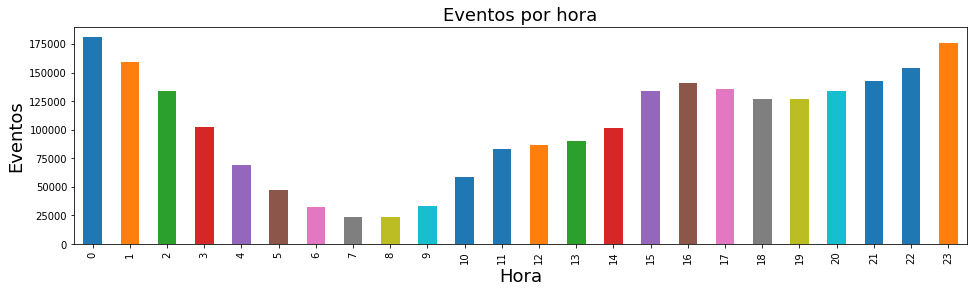

In [12]:
plotHora = events.groupby('Hour').count()['event_id'].plot(kind='bar',figsize=(16,4));

plotHora.set_title("Eventos por hora", fontsize=18)
plotHora.set_xlabel("Hora",fontsize=18)
plotHora.set_ylabel("Eventos", fontsize=18)

In [69]:
plotYear = events.groupby('date').count()['event_id'].plot(figsize=(12,8));

MemoryError: 

In [34]:
events.groupby('Hour').count()['event_id'].max()

181072

In [26]:
events.groupby('Hour').count()['event_id'].min()

23623

 #### Podemos ver que a las 00:00hs se acumula la mayor cantidad de eventos con 181072. Y la menor acumulacion ocurre a las 7am con 23623 eventos.

Text(0,0.5,'Eventos')

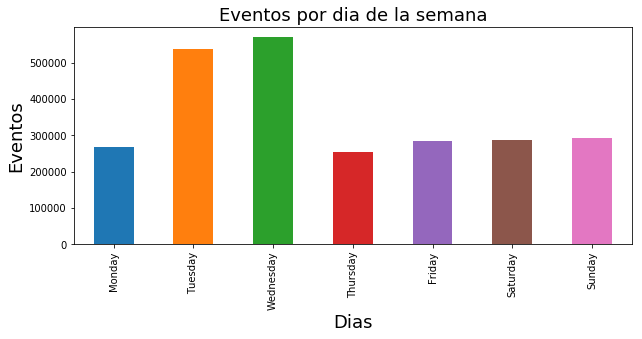

In [13]:
plotSem = events.groupby('Weekday').count()['event_id'].plot(kind='bar',figsize=(10,4));
plotSem.set_title("Eventos por dia de la semana", fontsize=18)
plotSem.set_xlabel("Dias",fontsize=18)
plotSem.set_ylabel("Eventos", fontsize=18)

#### Analizando el grafico y algunas propiedades más del dataframe se puede determinar que el día de la semana que mas eventos ocurren son los Miercoles con 569772, y el dia de la semana en que ocurre menos eventos son los jueves con 253706

In [55]:
 events.groupby('Weekday').count()['event_id'].sort_values(ascending = False).head(1)

Weekday
Wednesday    569772
Name: event_id, dtype: int64

In [58]:
 events.groupby('Weekday').count()['event_id'].sort_values(ascending = True).head(1)

Weekday
Thursday    253706
Name: event_id, dtype: int64

In [36]:
 events.groupby('Weekday').count()['event_id'].min()

253706

In [57]:
 events.groupby('Weekday').count()['event_id'].max()

569772

Text(0,0.5,'Eventos')

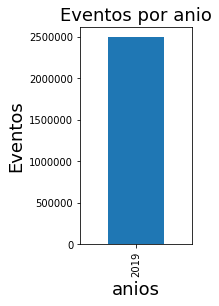

In [14]:
plotAnual = events.groupby('Year').count()['event_id'].plot(kind='bar',figsize=(2,4));

plotAnual.set_title("Eventos por anio", fontsize=18)
plotAnual.set_xlabel("anios",fontsize=18)
plotAnual.set_ylabel("Eventos", fontsize=18)

## Para obtener mas detalle, podemos ver las tablas a continuacion

In [32]:
 events.groupby('Weekday').count()['event_id']

Weekday
Monday       268884
Tuesday      537214
Wednesday    569772
Thursday     253706
Friday       285535
Saturday     286221
Sunday       293091
Name: event_id, dtype: int64

In [33]:
events.groupby('Hour').count()['event_id']

Hour
0     181072
1     159288
2     133891
3     102469
4      69027
5      46961
6      32295
7      23623
8      24076
9      32899
10     58244
11     82888
12     86290
13     89836
14    101452
15    134192
16    140399
17    135168
18    127056
19    126855
20    133759
21    142695
22    154274
23    175714
Name: event_id, dtype: int64

In [34]:
 events.groupby('Year').count()['event_id']

Year
2019    2494423
Name: event_id, dtype: int64

## Aca se pueden apreciar los diferentes tipos de eventos ocurridos en el año...

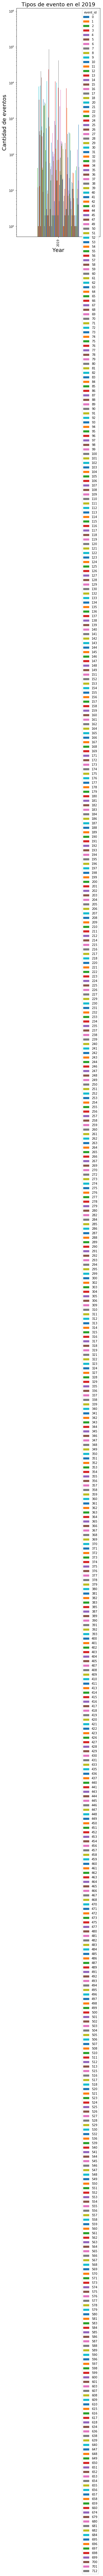

In [62]:
plotEventosAnio=pd.crosstab(events.Year, events.event_id).plot(kind='bar',figsize=(5,14));
plotEventosAnio.set_title("Tipos de evento en el 2019", fontsize=18)
plotEventosAnio.set_xlabel("Year",fontsize=18)
plotEventosAnio.set_ylabel("Cantidad de eventos", fontsize=18)
plotEventosAnio.set_yscale('log')


### Se debe plotear de alguna manera más descriptiva

## Ahora analizaremos desde donde vienen los diferentes eventos

#### #La idea sería filtrar las filas que no representan un pais pero en este caso no podemos, ya que los datos son incoherentes con el nombre real del pais


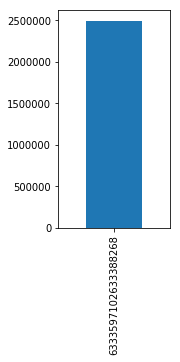

In [15]:
plotDeviceCountryCode=events['device_countrycode'].value_counts()[0:2].plot(kind='bar',figsize=(2,4));



### Al parecer todos los eventos vienen desde un mismo pais

Text(0,0.5,'Eventos')

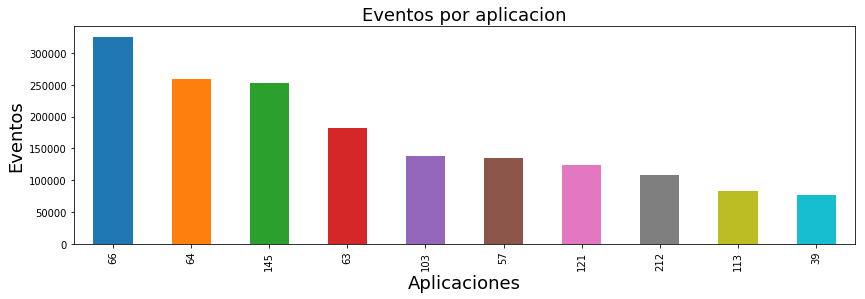

In [16]:
plotAppId=events['application_id'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotAppId.set_title("Eventos por aplicacion", fontsize=18)
plotAppId.set_xlabel("Aplicaciones",fontsize=18)
plotAppId.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

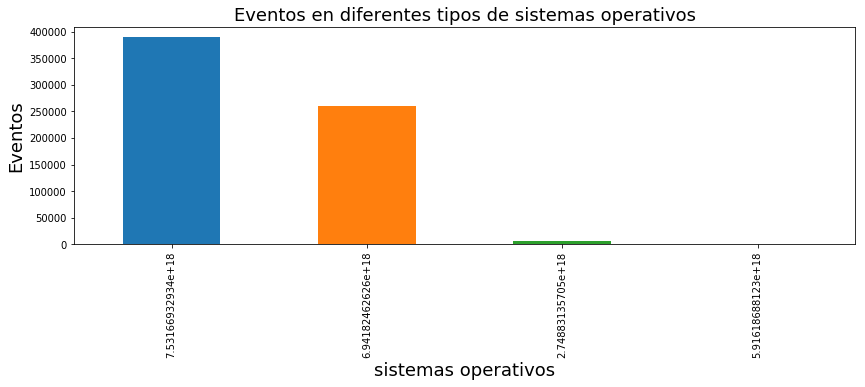

In [14]:
plotDeviceOs=events['device_os'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotDeviceOs.set_title("Eventos en diferentes tipos de sistemas operativos", fontsize=18)
plotDeviceOs.set_xlabel("sistemas operativos",fontsize=18)
plotDeviceOs.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

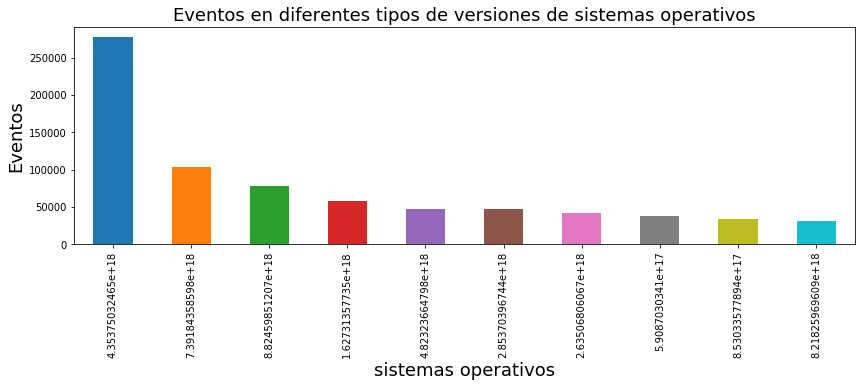

In [41]:
plotDeviceOsV=events['device_os_version'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotDeviceOsV.set_title("Eventos en diferentes tipos de versiones de sistemas operativos", fontsize=18)
plotDeviceOsV.set_xlabel("versiones de sistemas operativos",fontsize=18)
plotDeviceOsV.set_ylabel("Eventos", fontsize=18)

### Observaremos a continuacion la cantidad de marcas diferentes por dispositivo y sus eventos asociados

Text(0,0.5,'Eventos')

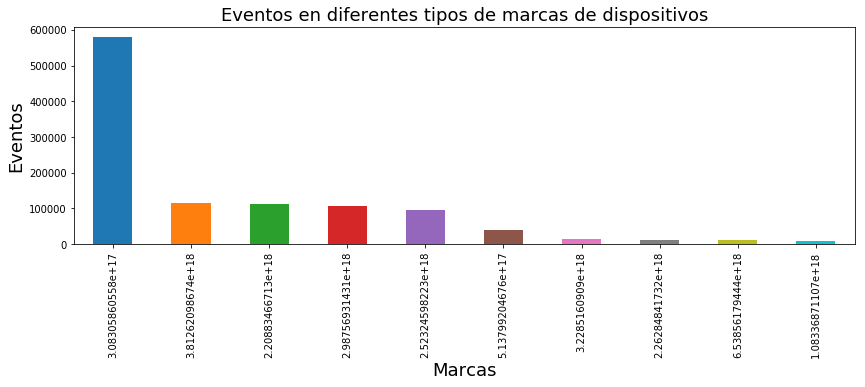

In [40]:
plotDeviceBrand=events['device_brand'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotDeviceBrand.set_title("Eventos en diferentes tipos de marcas de dispositivos", fontsize=18)
plotDeviceBrand.set_xlabel("Marcas",fontsize=18)
plotDeviceBrand.set_ylabel("Eventos", fontsize=18)

#### Podemos determinar que en un tipo de marca se produce la mayor cantidad de eventos, ¡casi 600000 eventos!

Text(0,0.5,'Eventos')

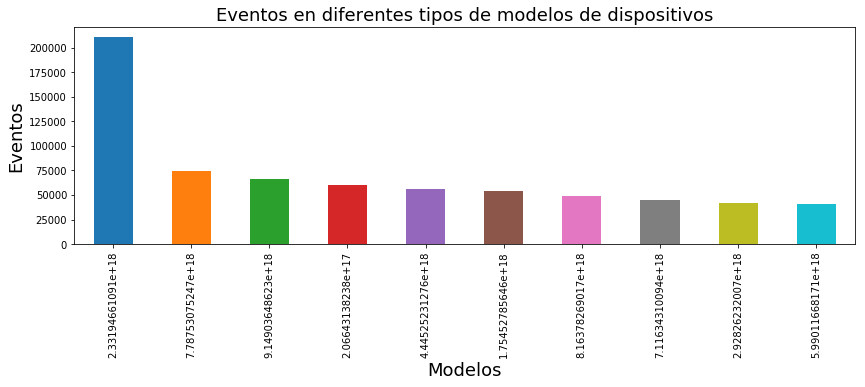

In [39]:
plotDeviceModel=events['device_model'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotDeviceModel.set_title("Eventos en diferentes tipos de modelos de dispositivos", fontsize=18)
plotDeviceModel.set_xlabel("Modelos",fontsize=18)
plotDeviceModel.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

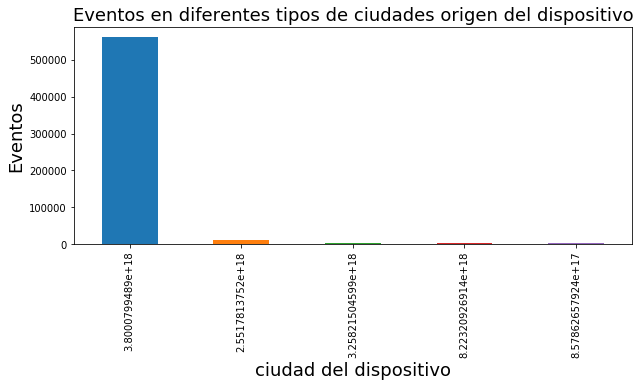

In [38]:
plotDeviceCity=events['device_city'].value_counts()[0:5].plot(kind='bar',figsize=(10,4));
plotDeviceCity.set_title("Eventos en diferentes tipos de ciudades origen del dispositivo", fontsize=18)
plotDeviceCity.set_xlabel("ciudad del dispositivo",fontsize=18)
plotDeviceCity.set_ylabel("Eventos", fontsize=18)

#### Aca podemos determinar algo parecido a las marcas, predomina un tipo de modelo de dispositivo

## Aca podemos ver que muchos eventos son generados con la misma IP (No legitimas)

Text(0,0.5,'Eventos')

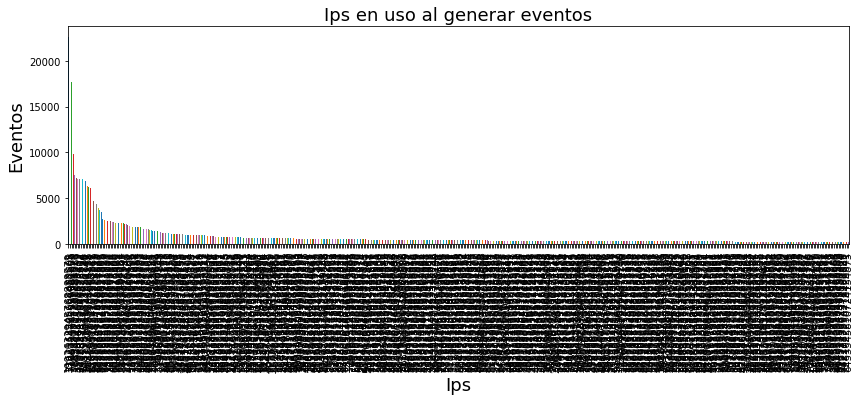

In [67]:
plotIpAddres=events['ip_address'].value_counts()[0:500].plot(kind='bar',figsize=(14,4));
plotIpAddres.set_title("Ips en uso al generar eventos", fontsize=18)
plotIpAddres.set_xlabel("Ips",fontsize=18)
plotIpAddres.set_ylabel("Eventos", fontsize=18)

### podemos obtener un zoom de estas para tener mejor detalle

Text(0,0.5,'Eventos')

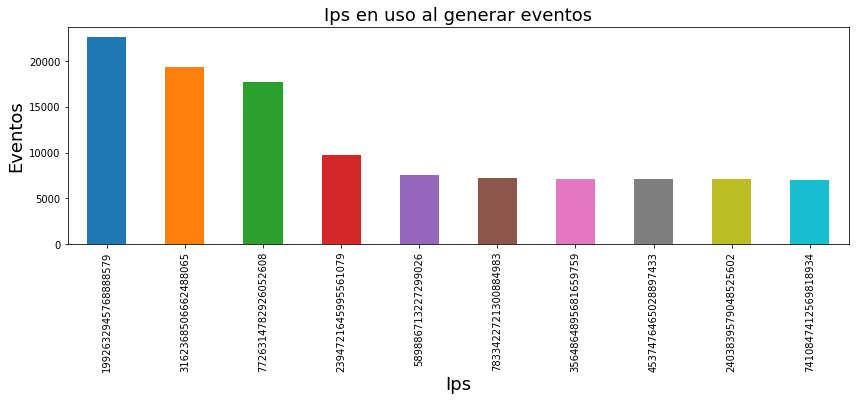

In [17]:
plotIpAddres=events['ip_address'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotIpAddres.set_title("Ips en uso al generar eventos", fontsize=18)
plotIpAddres.set_xlabel("Ips",fontsize=18)
plotIpAddres.set_ylabel("Eventos", fontsize=18)

#### Podemos observar que una IP genera más de 20000 eventos, podemos comenzar a sospechar 

### Ahora analizaremos el tipo de referido para los diferentes eventos. Estos referidos pueden ser  apple_ifa o google_advertising_id 

Text(0,0.5,'Eventos')

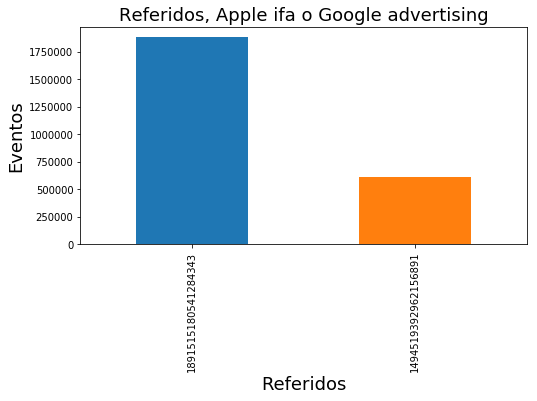

In [42]:
plotRefType=events['ref_type'].value_counts()[0:10].plot(kind='bar',figsize=(8,4));
plotRefType.set_title("Referidos, Apple ifa o Google advertising", fontsize=18)
plotRefType.set_xlabel("Referidos",fontsize=18)
plotRefType.set_ylabel("Eventos", fontsize=18)

### Dispositivo asociado con apple if o google advertising

Text(0,0.5,'Eventos')

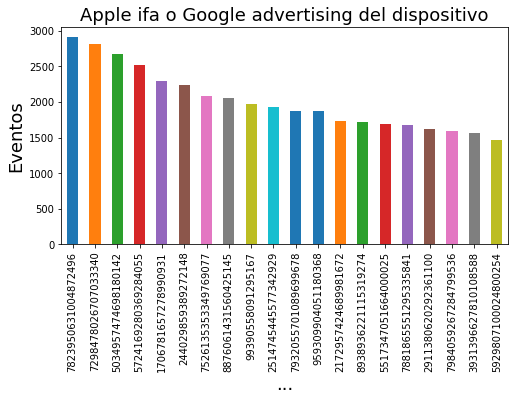

In [43]:
plotRefHash=events['ref_hash'].value_counts()[0:20].plot(kind='bar',figsize=(8,4));
plotRefHash.set_title("Apple ifa o Google advertising del dispositivo", fontsize=18)
plotRefHash.set_xlabel("...",fontsize=18)
plotRefHash.set_ylabel("Eventos", fontsize=18)

## Ahora podremos observar cuales de los diferentes eventos fueron atribuidos a JAMPP

Text(0,0.5,'Eventos')

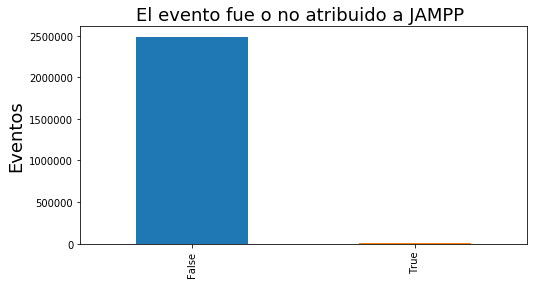

In [44]:
plotAtribuido=events['attributed'].value_counts()[0:20].plot(kind='bar',figsize=(8,4));
plotAtribuido.set_title("El evento fue o no atribuido a JAMPP ", fontsize=18)
#plotAtribuido.set_xlabel("",fontsize=18)
plotAtribuido.set_ylabel("Eventos", fontsize=18)

#### Como conclusion sabemos que la mayoría de los eventos no son atribuidos a JAMPP

Text(0,0.5,'Eventos')

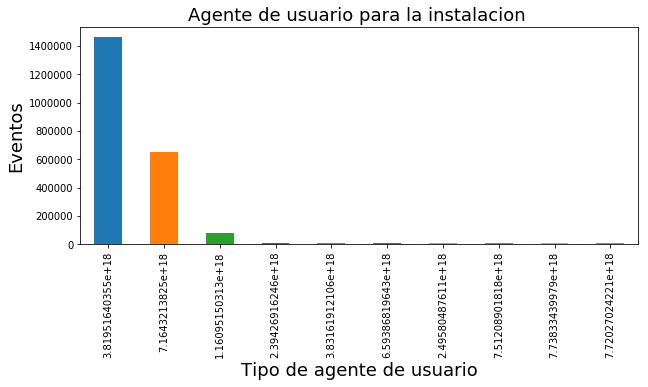

In [51]:

plotAgenteUsuario=events['session_user_agent'].value_counts()[0:10].plot(kind='bar',figsize=(10,4));
plotAgenteUsuario.set_title("Agente de usuario para la instalacion ", fontsize=18)
plotAgenteUsuario.set_xlabel("Tipo de agente de usuario",fontsize=18)
plotAgenteUsuario.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

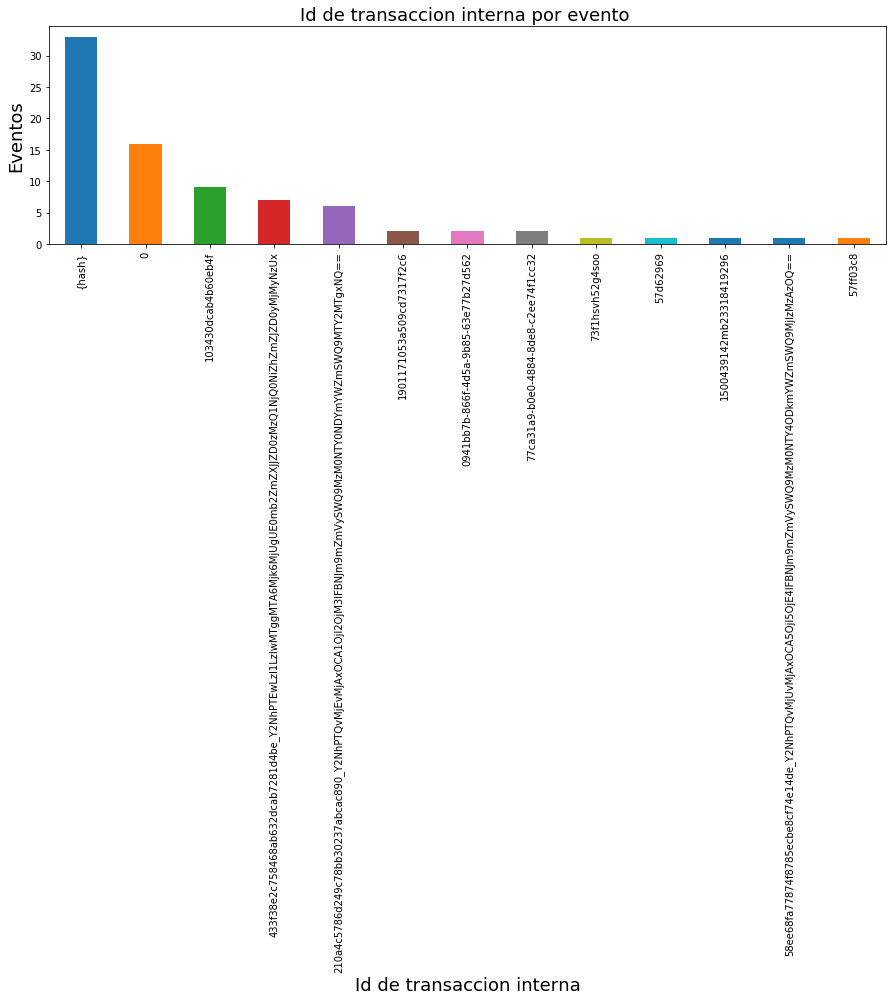

In [48]:
plotTransId=events['trans_id'].value_counts()[0:20].plot(kind='bar',figsize=(15,4));
plotTransId.set_title("Id de transaccion interna por evento ", fontsize=18)
plotTransId.set_xlabel("Id de transaccion interna",fontsize=18)
plotTransId.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

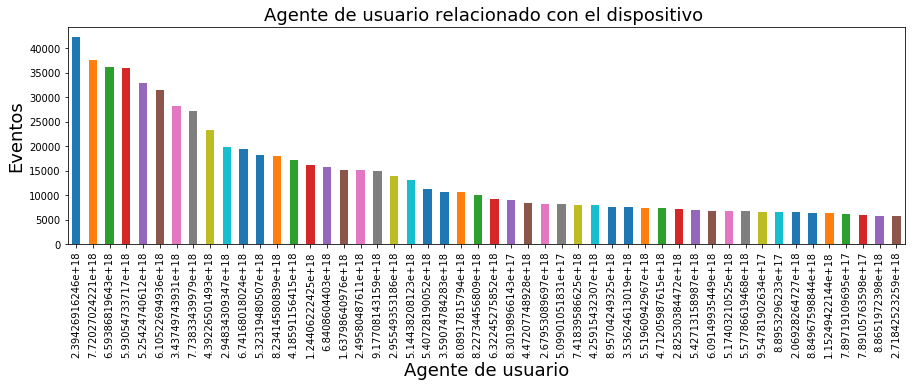

In [53]:
plotUserAgent=events['user_agent'].value_counts()[0:50].plot(kind='bar',figsize=(15,4));
plotUserAgent.set_title("Agente de usuario relacionado con el dispositivo ", fontsize=18)
plotUserAgent.set_xlabel("Agente de usuario",fontsize=18)
plotUserAgent.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

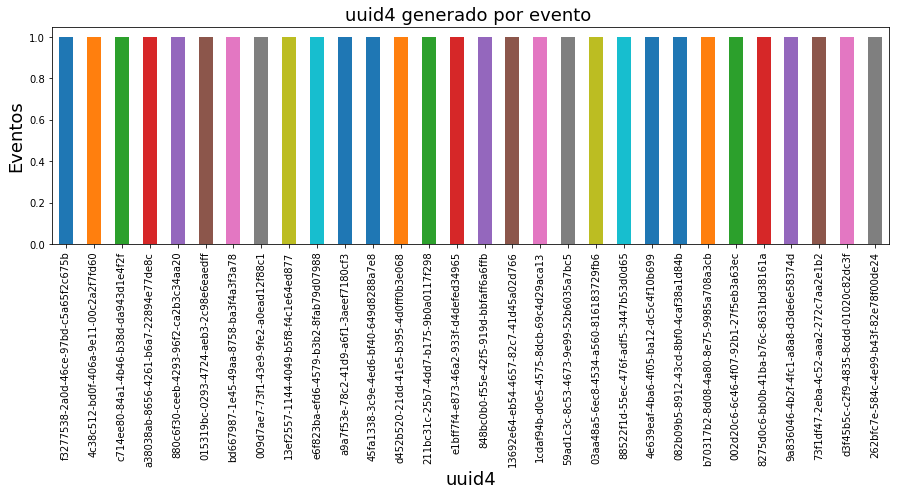

In [5]:
plotEventUuid4=events['event_uuid'].value_counts()[0:30].plot(kind='bar',figsize=(15,4));
plotEventUuid4.set_title("uuid4 generado por evento ", fontsize=18)
plotEventUuid4.set_xlabel("uuid4",fontsize=18)
plotEventUuid4.set_ylabel("Eventos", fontsize=18)

#### De este ultimo grafico podemos sacar la conclusion que por cada evento se genera un unico uuid4

Text(0,0.5,'Eventos')

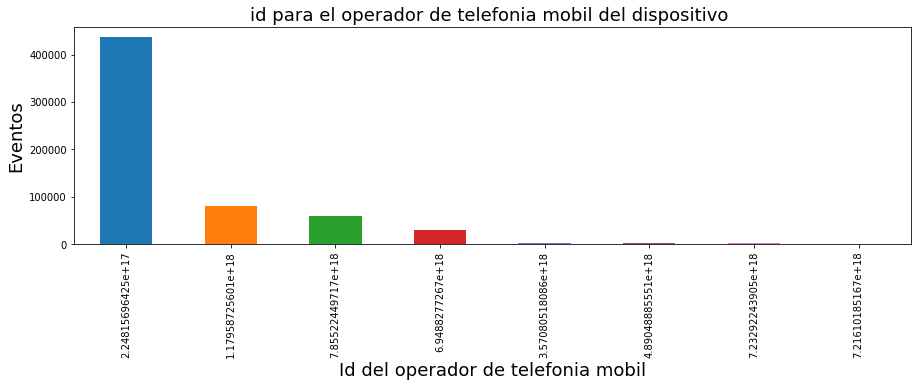

In [9]:
plotCarrier=events['carrier'].value_counts()[0:8].plot(kind='bar',figsize=(15,4));
plotCarrier.set_title("id para el operador de telefonia mobil del dispositivo ", fontsize=18)
plotCarrier.set_xlabel("Id del operador de telefonia mobil",fontsize=18)
plotCarrier.set_ylabel("Eventos", fontsize=18)

#### Podemos observar que predomina 1 telefonía movil, y que 4 almacenan la mayoría de eventos

Text(0,0.5,'Eventos')

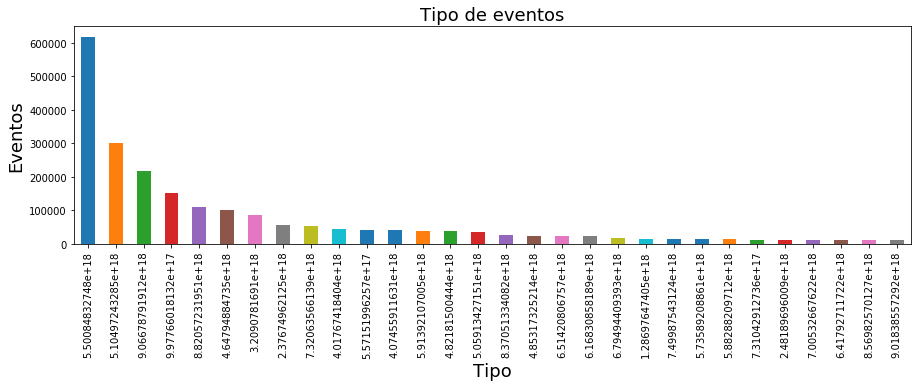

In [13]:
plotKind=events['kind'].value_counts()[0:30].plot(kind='bar',figsize=(15,4));
plotKind.set_title("Tipo de eventos", fontsize=18)
plotKind.set_xlabel("Tipo",fontsize=18)
plotKind.set_ylabel("Eventos", fontsize=18)

### Podemos ver que predomina un tipo de evento, ¿Que conclusion podemos sacar con este? ¿Cual evento podría ser?

Text(0,0.5,'Eventos')

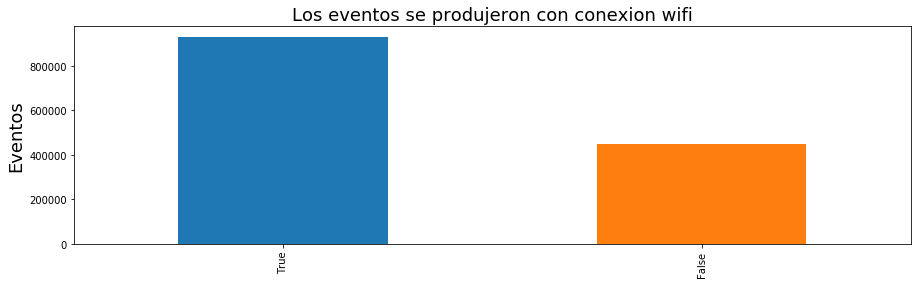

In [15]:
plotWifi=events['wifi'].value_counts()[0:30].plot(kind='bar',figsize=(15,4));
plotWifi.set_title("Los eventos se produjeron con conexion wifi", fontsize=18)
#plotWifi.set_xlabel("",fontsize=18)
plotWifi.set_ylabel("Eventos", fontsize=18)

#### Los eventos se produjeron en mayoría por conexion wifi

Text(0,0.5,'Eventos')

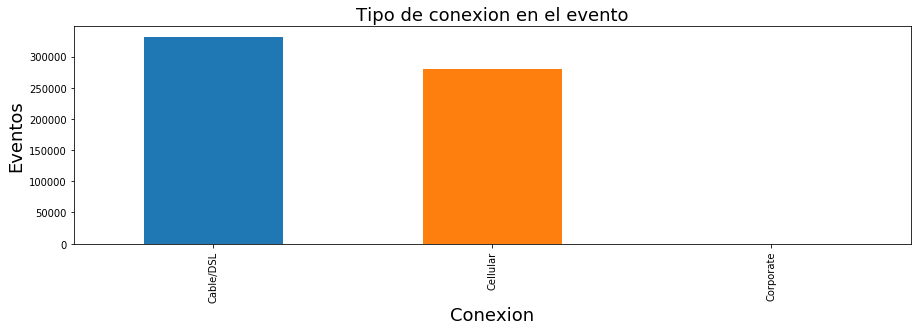

In [16]:
plotConnectType=events['connection_type'].value_counts()[0:30].plot(kind='bar',figsize=(15,4));
plotConnectType.set_title("Tipo de conexion en el evento", fontsize=18)
plotConnectType.set_xlabel("Conexion",fontsize=18)
plotConnectType.set_ylabel("Eventos", fontsize=18)

### Se pueden observar 3 tipos de conexiones, la predominante es CABLE/DSL o sea que se producen más eventos desde una casa (o variantes) , la segunda es una conexion movil y por ultimo se encuentran las conexiones corporativas.

Text(0,0.5,'Eventos')

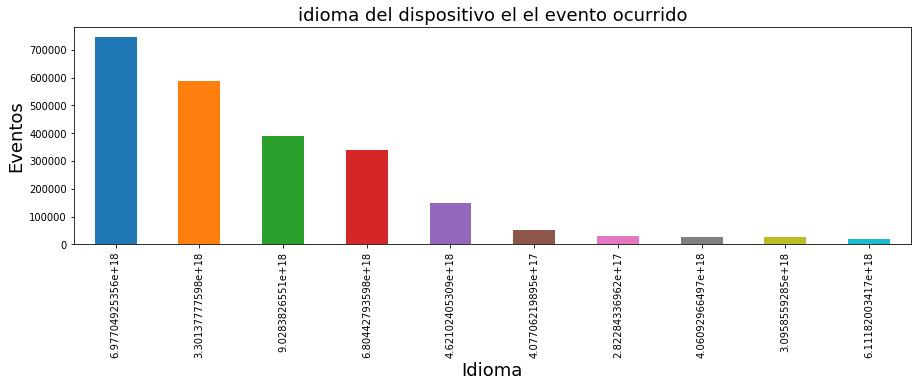

In [20]:
plotDLenguage=events['device_language'].value_counts()[0:10].plot(kind='bar',figsize=(15,4));
plotDLenguage.set_title("idioma del dispositivo el el evento ocurrido", fontsize=18)
plotDLenguage.set_xlabel("Idioma",fontsize=18)
plotDLenguage.set_ylabel("Eventos", fontsize=18)